<a href="https://colab.research.google.com/github/suzzingV/Time-Series-Analysis/blob/main/HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 1. 데이터 준비, 시계열 객체 생성
data <- scan("/content/female.txt")
ts_data <- ts(data)

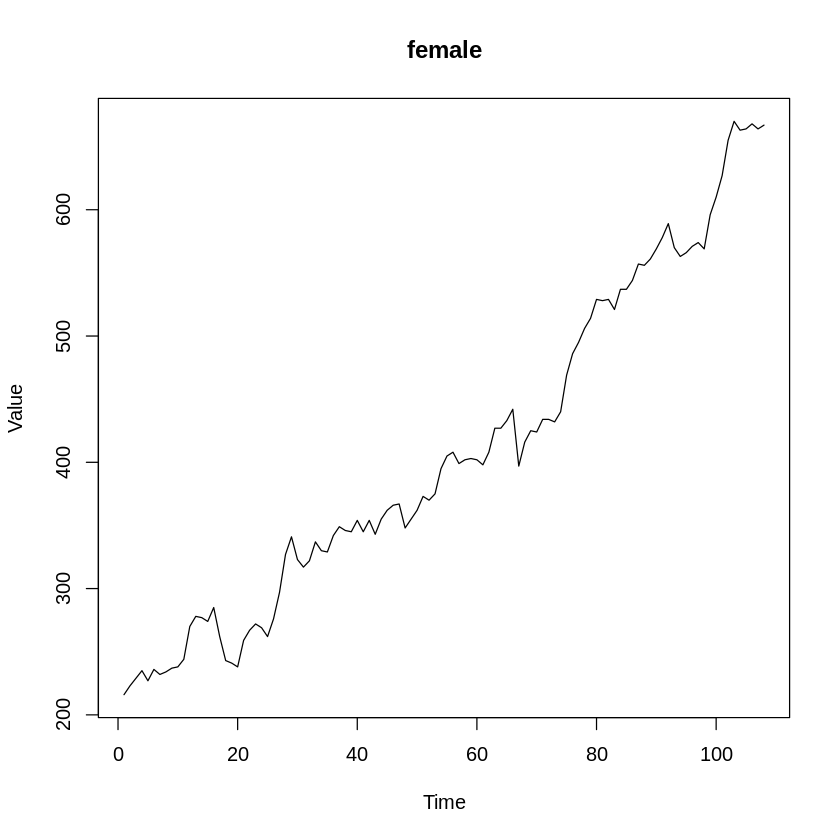

In [2]:
# 2. 데이터 시각화
plot(ts_data, main = "female", ylab = "Value", xlab = "Time")

In [4]:
# 3. 회귀모형 적합
time_var <- 1:length(data)
model <- lm(ts_data ~ time_var)
summary(model)


Call:
lm(formula = ts_data ~ time_var)

Residuals:
    Min      1Q  Median      3Q     Max 
-62.372 -17.080   0.326  16.135  63.929 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 186.34978    5.00807   37.21   <2e-16 ***
time_var      4.07496    0.07976   51.09   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 25.84 on 106 degrees of freedom
Multiple R-squared:  0.961,	Adjusted R-squared:  0.9606 
F-statistic:  2610 on 1 and 106 DF,  p-value: < 2.2e-16


In [9]:
# 4. Durbin-Watson 검정
install.packages('lmtest')
library(lmtest)
dwtest(model) # dw 값이 0에 가깝다, 2에서 멀다 -> 자기 상관성이 있다 -> 자기회귀모형 수행

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘zoo’


Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric





	Durbin-Watson test

data:  model
DW = 0.19325, p-value < 2.2e-16
alternative hypothesis: true autocorrelation is greater than 0


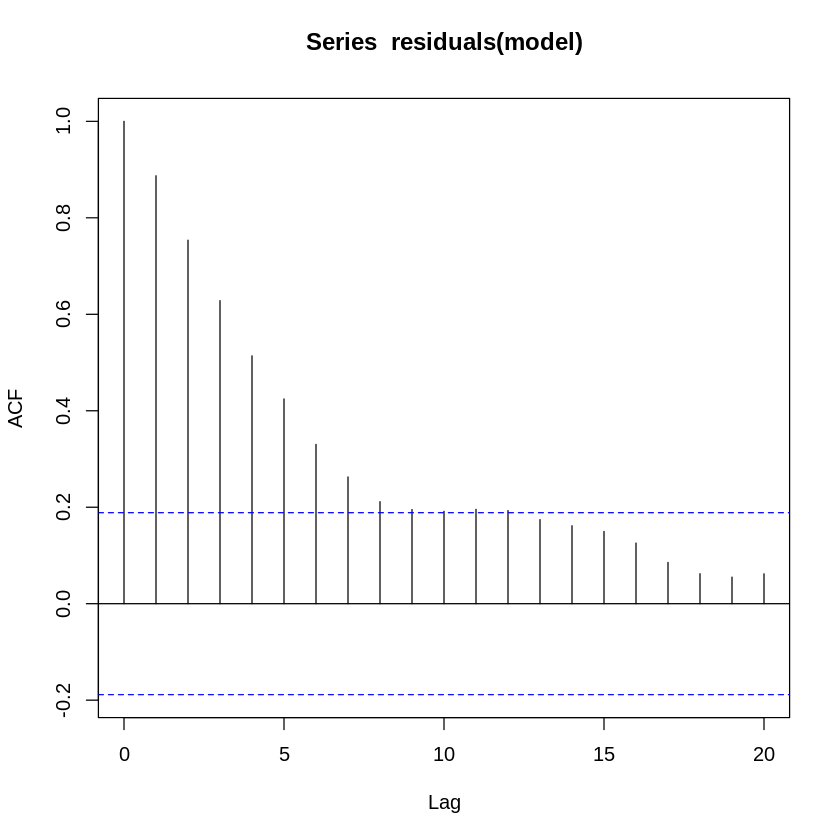

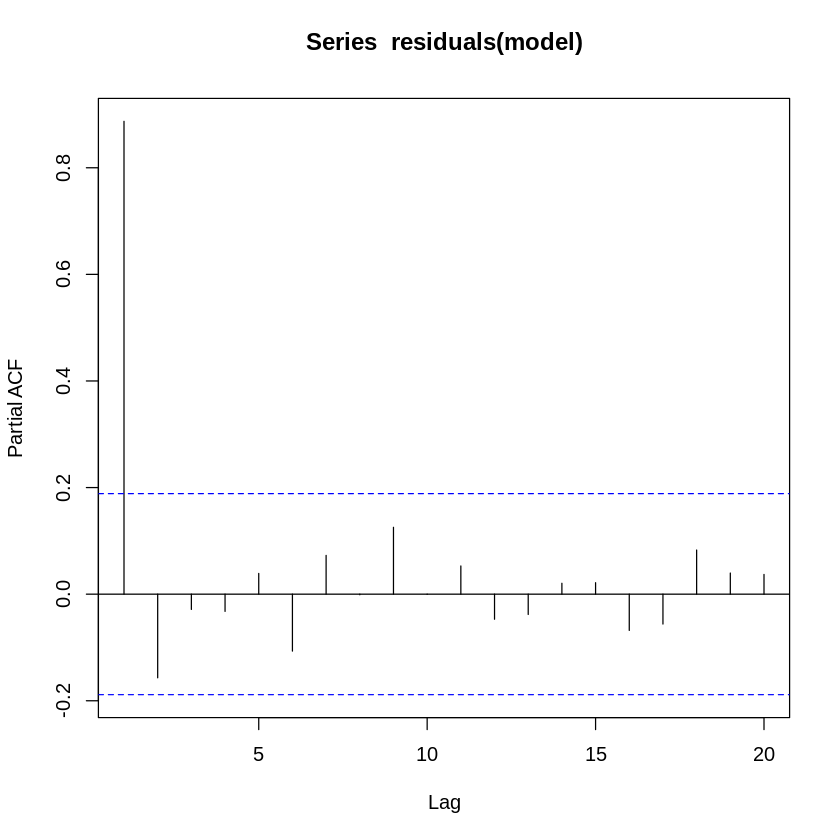

In [13]:
# 5 ACF 및 PACF 분석
# 자기회귀모형의 적절한 차수 결정
acf(residuals(model))
pacf(residuals(model))

# ACF: 몇 개의 시차에서 자기상관 높고, 이후 점진적으로 감소 -> 특정 시차 이후에 자기상관이 사실상 0에 수렴
#      첫 번째 이후 상관성이 사라지므로 차수 1이 적합
#PACF: 첫 번째 제외하고 나머지에서는 대부분 상관성이 없음 -> 특정 시차 이후 상관성 없음
#      -> 차수 1이 적합

In [14]:
# 6. 자기회귀모형 적합
ar_model <- arima(ts_data, order(c(1, 0, 0)))

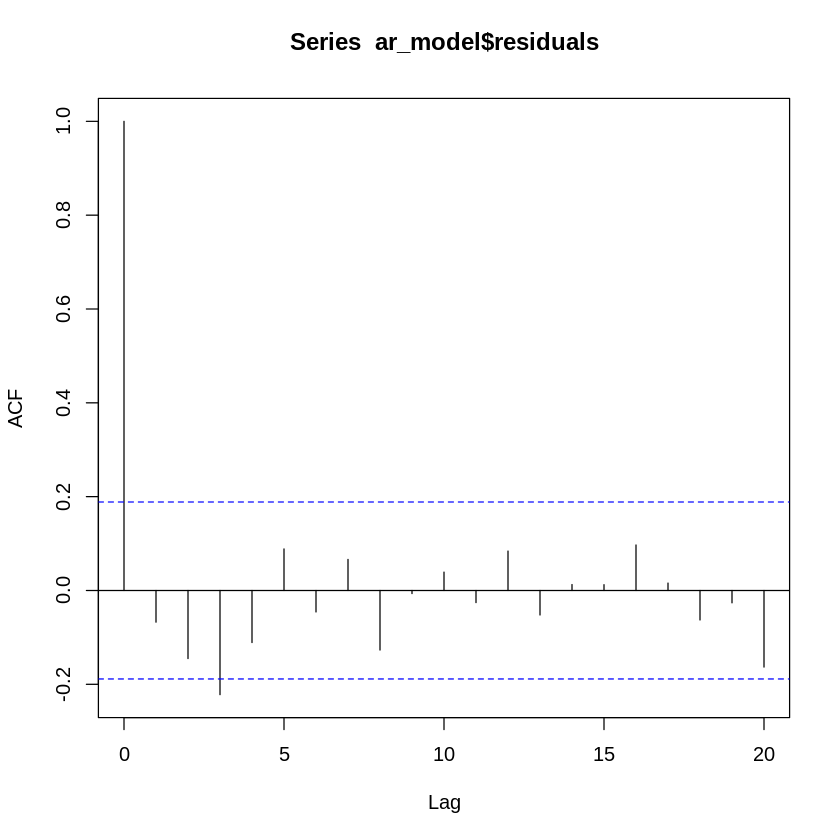

In [15]:
# 6. 모델 가정 검증
acf(ar_model$residuals)

# 첫 번째 시점에서의 자기상관 높게 나타남 -> 이전 시간 단위의 값이 다음 시간 단위의 값에 영향을 미치고 있음
# 첫 번째 이후의 자기 상관은 0 주변을 오가고 있음 -> 유의미한 자기상관 없음